# Solving Sudoku with AI



What is a Sudoku?

Sudoku is one of the world's most popular puzzles. It consists of a 9x9 grid, and the objective is to fill the grid with digits in such a way that each row, each column, and each of the 9 principal 3x3 subsquares contains all of the digits from 1 to 9. 


The puzzle is given as a partially completed grid, and the goal is to fill in the missing numbers. Below is an example of such a grid.



### Unsolved sudoku example

Let's get started by trying to solve a sudoku puzzle ourselves which will allow us to discover and become comfortable with the techniques that our agent may end up using.

<img src="images/image.png">(attachment:image.png)

## Sudoku: Solution
Here is the solution for the Sudoku.

Your solution probably consisted of the following two steps (and maybe more):

* If a box has a value, then all the boxes in the same row, same column, or same 3x3 square cannot have that same value.
* If there is only one allowed value for a given box in a row, column, or 3x3 square, then the box is assigned that value.


<img src="images/image-2.png">(attachment:image-2.png)

### Goals of this notebook
The main goal of this notebook is to build an intelligent agent that will solve every sudoku while introducing you to diffferent powerful techniques that are used throughout the field of AI:

##### Constraint Propagation
When trying to solve a problem, you'll find that there are some local constraints to each square. These constraints help you narrow the possibilities for the answer, which can be very helpful. We will learn to extract the maximum information out of these constraints in order to get closer to our solution. Additionally, you'll see how we can repeatedly apply simple constraints to iteratively narrow the search space of possible solutions. Constraint propagation can be used to solve a variety of problems such as calendar scheduling, and cryptographic puzzles.

##### Search
In the process of problem solving, we may get to the point where two or more possibilities are available. What do we do? What if we branch out and consider both of them? Maybe one of them will lead us to a position in which three or more possibilities are available. Then, we can branch out again. At the end, we can create a whole tree of possibilities and find ways to traverse the tree until we find our solution. This is an example of how search can be used.

##### And, one more strategy called "Naked Twins":

[‘Naked Twin’ Sudoku puzzle solving guide](http://www.sudokudragon.com/guidenakedtwins.htm)





## Setting up the board: Naming Conventions

### Rows and Columns

* The rows will be labelled by the letters A, B, C, D, E, F, G, H, I.
* The columns will be labelled by the numbers 1, 2, 3, 4, 5, 6, 7, 8, 9.

### Boxes, Units, and Peers

* Individual squares at the intersection of rows = `boxes`
* Complete rows, columns and 3x3 squares = `units`
* All other boxes that belong to a common unit (i.e. same row, column, or 3x3 square) = `peers`

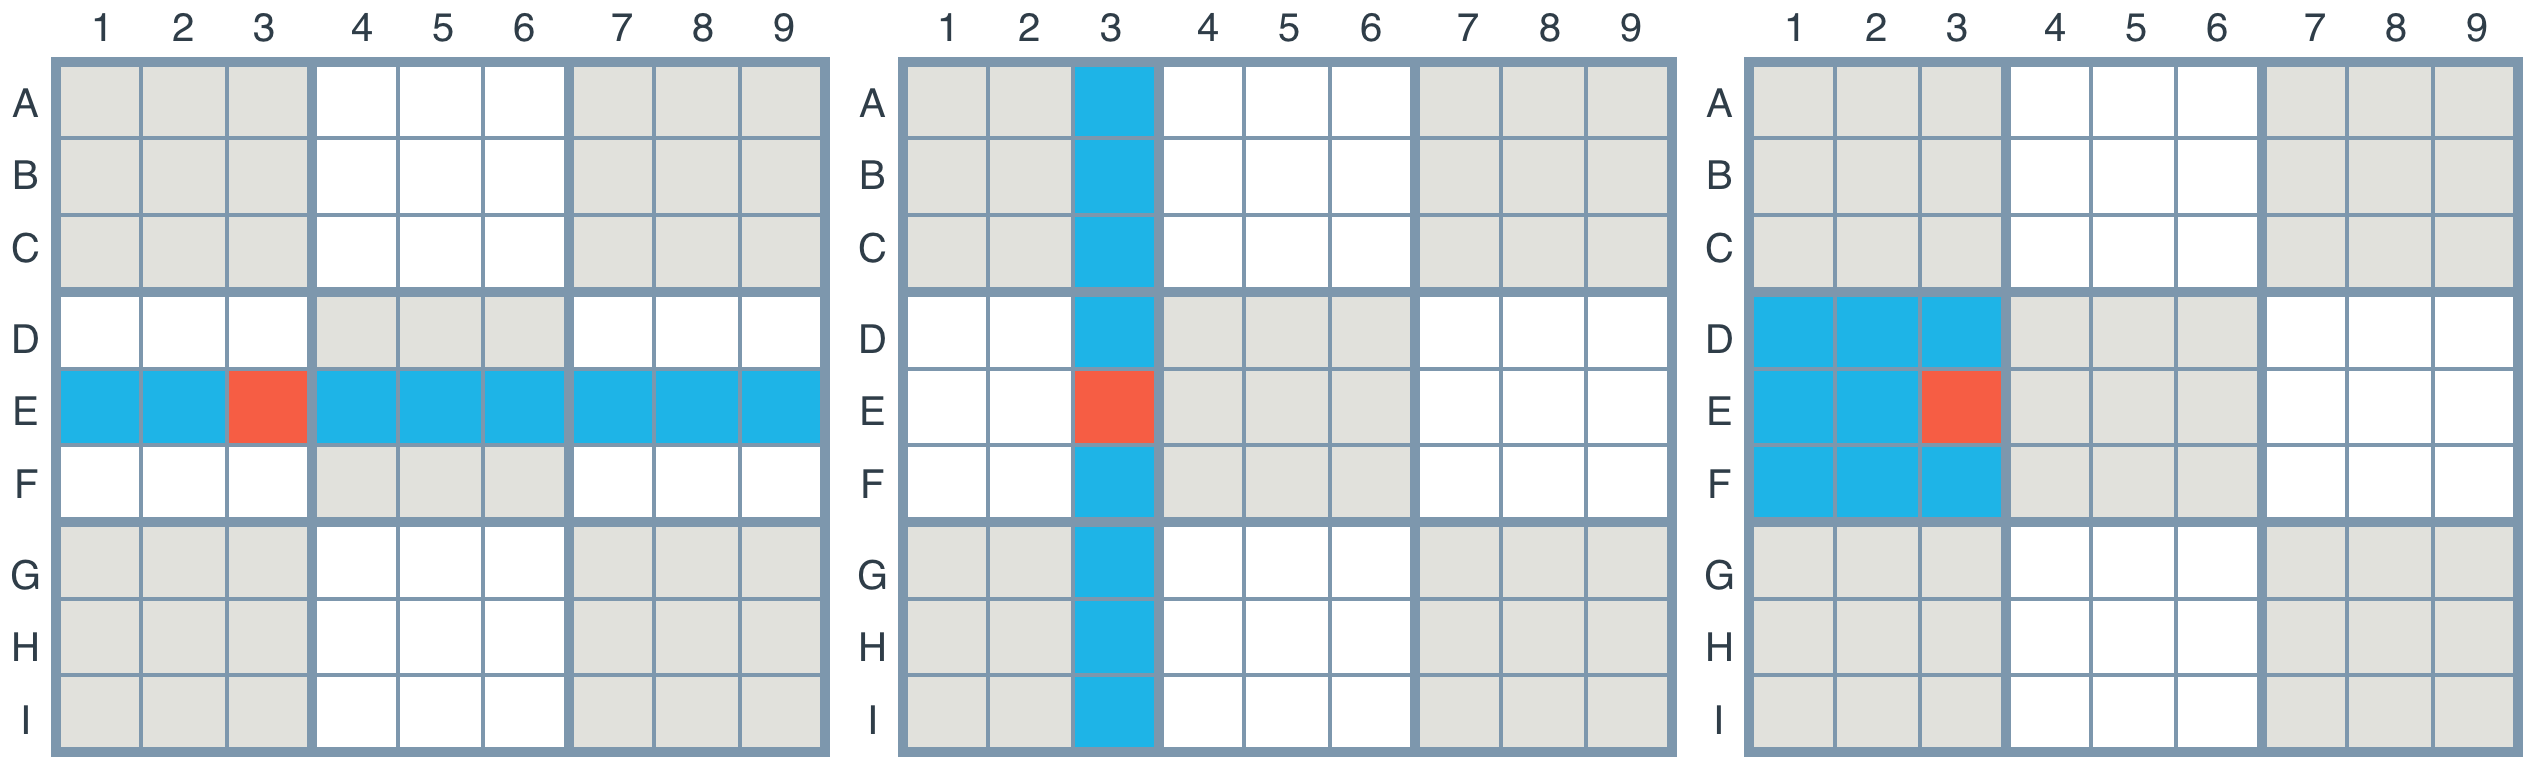

### Solving the sudoku puzzle with `string` and `dictionary`.

* If the puzzle is not solved, we use `.` as a placeholder for an empty box.
* Dictionary: keys will be strings (`A1`,`A2`,...,`I9`), values will be the digit in each box or `.`.

In [1]:
rows = 'ABCDEFGHI'
cols = '123456789'

* Then, we define a helper function, `cross(a,b)`, which, given two strings `a` and `b` will return the list formed by all the possible concatenations of a letter `s` in string `a` with a letter `t` in string `b`.
* Thus, `cross('abc','def')` will return `['ad','ae','af','bd','be','bf','cd','ce','cf']`.

In [2]:
def cross(a,b):
    return [s+t for s in a for t in b]

In [3]:
# Create the lables of the boxes

boxes = cross(rows,cols)
boxes =  ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
          'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9',
          'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
          'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
          'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9',
          'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
          'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9',
          'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9',
          'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']

# For the units

row_units = [cross(r,cols) for r in rows]
# Element example:
# row_units[0] = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']
# This is the top most row.

column_units = [cross(rows,c) for c in cols]
# Element example:
# column_units[0] = ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1']
# This is the left most column.

square_units = [cross(rs,cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
# Element example:
# square_units[0] = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']
# This is the top left square.

unitlist = row_units + column_units + square_units

* Next, implement `grid_values()` for a function to convert the string representation of a puzzle into a dictionary form.
* It should result in {'A1':'.', 'A2':'.', 'A3':'3', ... 'I9':'.'}

* Following is an example of what you should see when you implement this function correctly.
* The `display()` function shows a visual representation of the dictionary, and has been provided in `utils.py`.

In [4]:
# utils.py

rows = 'ABCDEFGHI'
cols = '123456789'

def cross(a, b):
    return [s+t for s in a for t in b]

boxes = cross(rows, cols)

row_units = [cross(r, cols) for r in rows]
column_units = [cross(rows, c) for c in cols]
square_units = [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units + column_units + square_units
units = dict((s, [u for u in unitlist if s in u]) for s in boxes)
peers = dict((s, set(sum(units[s],[]))-set([s])) for s in boxes)
dic = {}

In [5]:
def display(values):
    """
    Display the values as a 2-D grid.
    Input: The sudoku in dictionary form
    Output: None
    """
    width = 1+max(len(values[s]) for s in boxes)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width)+('|' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)
    return

In [6]:
def grid2values(grid):
    """Convert grid string into {<box>: <value>} dict with '.' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '.' if it is empty.
    """
    assert len(grid) == 81, "Input grid must be a string of length 81 (9x9)"
    return dict(zip(boxes, grid))

In [7]:
display(grid2values('..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'))

. . 3 |. 2 . |6 . . 
9 . . |3 . 5 |. . 1 
. . 1 |8 . 6 |4 . . 
------+------+------
. . 8 |1 . 2 |9 . . 
7 . . |. . . |. . 8 
. . 6 |7 . 8 |2 . . 
------+------+------
. . 2 |6 . 9 |5 . . 
8 . . |2 . 3 |. . 9 
. . 5 |. 1 . |3 . . 


### Strategy 1: Elimination

If a box has a value assigned, then none of the peers of this box can have this value!
* To eliminate values, we can take one pass, go over every box that has a value, and eliminate the values that can't appear on the box, based on its peers.

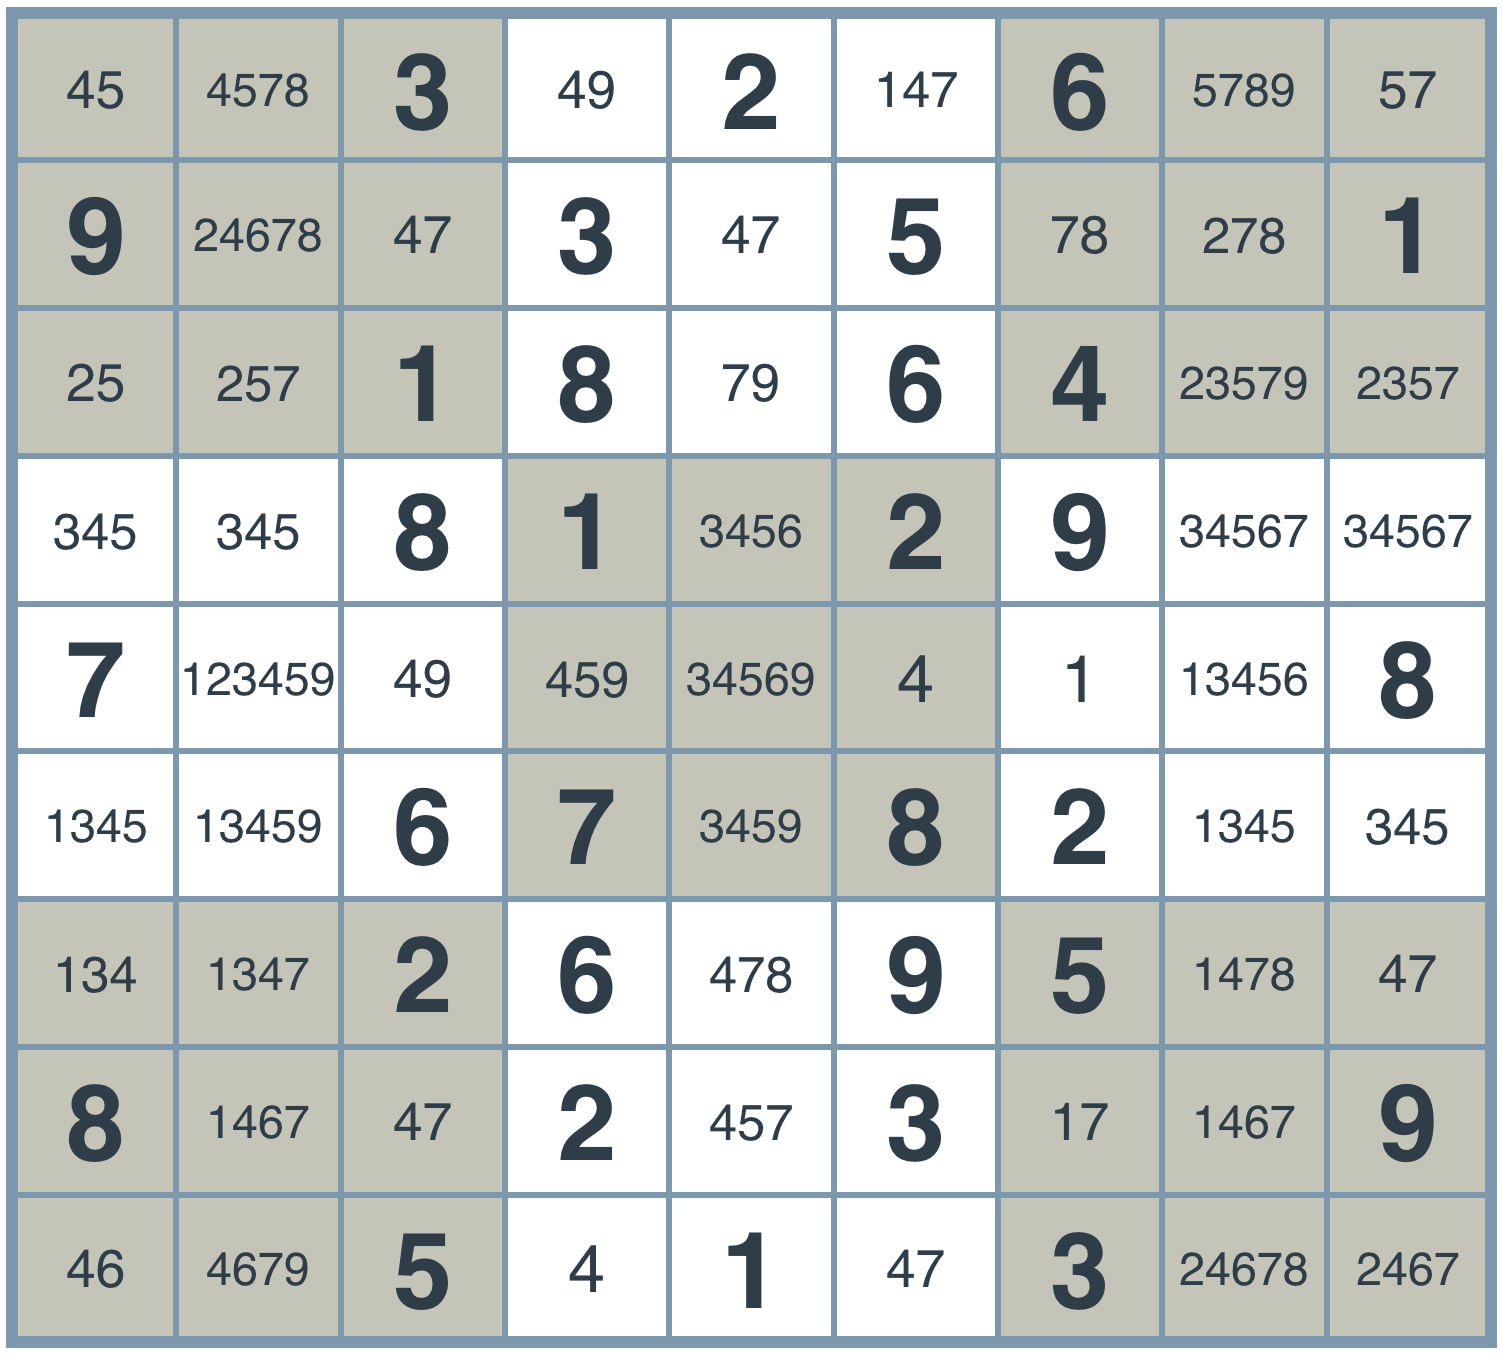

As of now, we have a dictionary where the keys are the boxes (`'A1','A2',...,'I9'`) and the values are either the value for each box or `'.'`.
Now, modify the value to represent all the available values for that box.

Update the `grid_values()` function to return `'123456789'` instead of `'.'` for empty boxes.

In [8]:
def grid_values(grid):
    """Convert grid string into {<box>: <value>} dict with '123456789' value for empties.

    Args:
        grid: Sudoku grid in string form, 81 characters long
    Returns:
        Sudoku grid in dictionary form:
        - keys: Box labels, e.g. 'A1'
        - values: Value in corresponding box, e.g. '8', or '123456789' if it is empty.
    """
    values = []
    all_digits = '123456789'
    for c in grid:
        if c == '.':
            values.append(all_digits)
        elif c in all_digits:
            values.append(c)
    assert len(values) == 81
    return dict(zip(boxes, values))

In [9]:
g_v = grid_values('..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..')
display(g_v)

123456789 123456789     3     |123456789     2     123456789 |    6     123456789 123456789 
    9     123456789 123456789 |    3     123456789     5     |123456789 123456789     1     
123456789 123456789     1     |    8     123456789     6     |    4     123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     8     |    1     123456789     2     |    9     123456789 123456789 
    7     123456789 123456789 |123456789 123456789 123456789 |123456789 123456789     8     
123456789 123456789     6     |    7     123456789     8     |    2     123456789 123456789 
------------------------------+------------------------------+------------------------------
123456789 123456789     2     |    6     123456789     9     |    5     123456789 123456789 
    8     123456789 123456789 |    2     123456789     3     |123456789 123456789     9     
123456789 123456789     5     |123456789     1     123456789 |    3   

Now, make a function `eliminate()` which will take as input a puzzle in dictionary form.
The function will interate over all the boxes in the puzzle that only have one value assigned to them, and it will remove this value from every one of its peers.

In [10]:
def eliminate(values):
    """
    Args:
        values: Sudoku in dictionary form.
    Returns:
        Resulting Sudoku in dictionary form after eliminating values.
    """
    solved_values = [box for box in values.keys() if len(values[box]) == 1]
    for box in solved_values:
        digit = values[box]
        for peer in peers[box]:
            values[peer] = values[peer].replace(digit,'')
    return values

In [11]:
display(eliminate(grid_values('..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..')))

   45    4578    3   |   49     2     147  |   6     5789    57  
   9    24678    47  |   3      47     5   |   78    278     1   
   25    257     1   |   8      79     6   |   4    23579   2357 
---------------------+---------------------+---------------------
  345    345     8   |   1     3456    2   |   9    34567  34567 
   7    123459   49  |  459   34569    4   |   1    13456    8   
  1345  13459    6   |   7     3459    8   |   2     1345   345  
---------------------+---------------------+---------------------
  134    1347    2   |   6     478     9   |   5     1478    47  
   8     1467    47  |   2     457     3   |   17    1467    9   
   46    4679    5   |   4      1      47  |   3    24678   2467 


With `eliminate()`, we obtain the following sudoku puzzle:

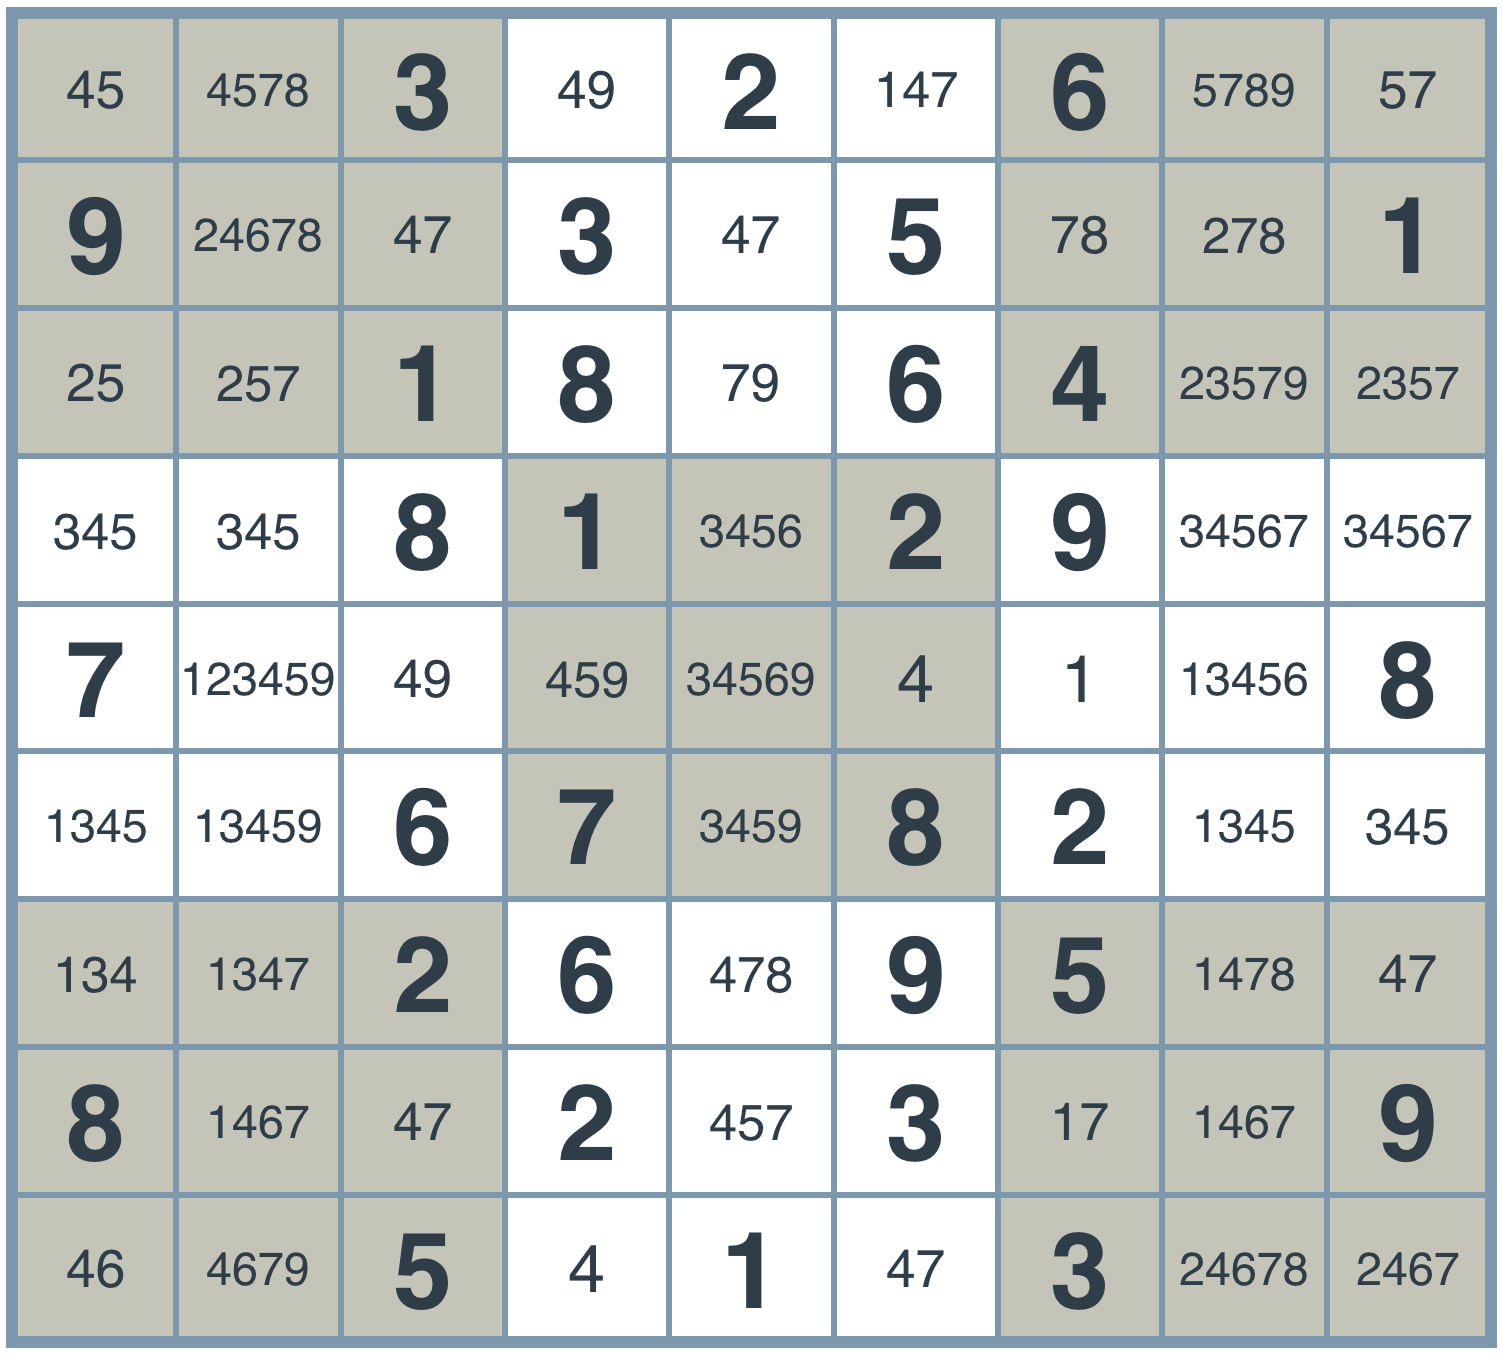


### Strategy 2: Only Choice

If there is only one box in a unit which would allow a certain digit, then that box must be assigned that digit.

Now, code the function `only_choice` which takes as input a puzzle in dictionary form.
The function will go through all the units, and if there is a unit with a digit that only fits in one possible box, it will assign that digit to that box.

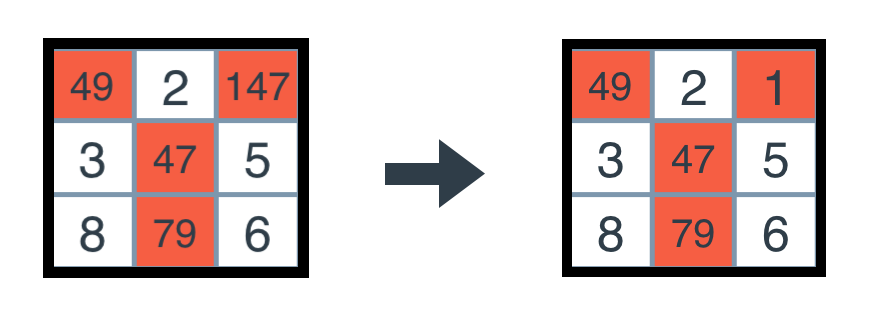

In [12]:
def only_choice(values):
    """
    Input: Sudoku in dictionary form.
    Output: Resulting Sudoku in dictionary form after filling in only choices.
    """
    for unit in unitlist:
        for digit in '123456789':
            dplaces = [box for box in unit if digit in values[box]]
            if len(dplaces) == 1:
                values[dplaces[0]] = digit
    return values

In [13]:
display(only_choice(eliminate(grid_values('..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'))))

  45    8     3   |  9     2     1   |  6    5789   57  
  9     6     47  |  3     4     5   |  8    278    1   
  2    257    1   |  8     7     6   |  4   23579  2357 
------------------+------------------+------------------
 345   345    8   |  1    3456   2   |  9   34567 34567 
  7     2     9   |  5   34569   4   |  1   13456   8   
 1345 13459   6   |  7    3459   8   |  2    1345  345  
------------------+------------------+------------------
 134   1347   2   |  6     8     9   |  5    1478   47  
  8    1467   47  |  2     5     3   |  17    6     9   
  6     9     5   |  4     1     7   |  3     8     2   


### Strategy 3: Naked twins

The naked twins strategy says that if you have two or more unallocated boxes in a unit and there are only two digits that can go in those two boxes, then those two digits can be eliminated from the possible assignments of all other boxes in the same unit.

<img src="images/nt.png">

In [14]:
def naked_twins(values):
    """Eliminate values using the naked twins strategy.
    
    Parameters
    ----------
    values(dict)
        a dictionary of the form {'box_name': '123456789', ...}

    Returns
    -------
    dict
        The values dictionary with the naked twins eliminated from peers
    """ 
    box_twin = [box for box in values if len(values[box]) == 2]
    twin_boxes = [] 
    for box1 in box_twin:
        for box2 in peers[box1]:
            if (values[box1] == values[box2]):
                twin_boxes.append((box1,box2))
    for twins in twin_boxes:
        common_peers = set(peers[twins[0]]).intersection(peers[twins[1]])
        for peer in common_peers:
            for digit in values[twins[0]]:
                values[peer] = values[peer].replace(digit,'')
    return values

In [15]:
values = {'A1': '1', 'A2': '2', 'A3': '3', 'A4': '4', 'A5': '15', 'A6': '6', 'A7': '7', 'A8': '8', 'A9': '9', 'B1': '4', 'B2': '5', 'B3': '6', 'B4': '7', 'B5': '8', 'B6': '9', 'B7': '1', 'B8': '2', 'B9': '3', 'C1': '7', 'C2': '8', 'C3': '9', 'C4': '1', 'C5': '2', 'C6': '3', 'C7': '4', 'C8': '5', 'C9': '6', 'D1': '8', 'D2': '3', 'D3': '5', 'D4': '2', 'D5': '4', 'D6': '1', 'D7': '9', 'D8': '6', 'D9': '7', 'E1': '6', 'E2': '9', 'E3': '7', 'E4': '5', 'E5': '3', 'E6': '8', 'E7': '2', 'E8': '1', 'E9': '4', 'F1': '2', 'F2': '14', 'F3': '14', 'F4': '6', 'F5': '9', 'F6': '7', 'F7': '8', 'F8': '13', 'F9': '15', 'G1': '9', 'G2': '14', 'G3': '8', 'G4': '39', 'G5': '17', 'G6': '5', 'G7': '6', 'G8': '179', 'G9': '12', 'H1': '3', 'H2': '7', 'H3': '12', 'H4': '8', 'H5': '6', 'H6': '2', 'H7': '5', 'H8': '4', 'H9': '12', 'I1': '5', 'I2': '6', 'I3': '124', 'I4': '39', 'I5': '17', 'I6': '4', 'I7': '3', 'I8': '179', 'I9': '8'}



In [16]:
display(values)

 1   2   3  | 4   15  6  | 7   8   9  
 4   5   6  | 7   8   9  | 1   2   3  
 7   8   9  | 1   2   3  | 4   5   6  
------------+------------+------------
 8   3   5  | 2   4   1  | 9   6   7  
 6   9   7  | 5   3   8  | 2   1   4  
 2   14  14 | 6   9   7  | 8   13  15 
------------+------------+------------
 9   14  8  | 39  17  5  | 6  179  12 
 3   7   12 | 8   6   2  | 5   4   12 
 5   6  124 | 39  17  4  | 3  179  8  


In [17]:
values = naked_twins(values)
display(values)

 1   2   3  | 4   5   6  | 7   8   9  
 4   5   6  | 7   8   9  | 1   2   3  
 7   8   9  | 1   2   3  | 4   5   6  
------------+------------+------------
 8   3   5  | 2   4   1  | 9   6   7  
 6   9   7  | 5   3   8  | 2   1   4  
 2   14  14 | 6   9   7  | 8   3   5  
------------+------------+------------
 9   14  8  | 39  17  5  | 6   79  12 
 3   7   12 | 8   6      | 5   4   12 
 5   6  124 | 39  17  4  | 3   79  8  


In this example in the last square box, '1' has been erased from '179' since its occurence is a must in the boxes that has '12' respectively.

### Constraint Propagation

* Using local constraints in a space to dramatically reduce the search space.
* Examples: map coloring, Crypto-Arithmetic puzzles, and... sudoku!

Now, combine the functions `eliminate` and `only_choice` to write the function `reduce_puzzle`.
It receives as input an unsolved puzzle and applies our two constraints repeatedly in an attempt to solve it.

Think about the two cases:
* The function needs to stop if the puzzle gets solved.
* What if the function doesn't solve the sudoku? Can we make sure the function quits when applying the two strategies stops making progress?

In [18]:
def reduce_puzzle(values):
    """
    Iterate eliminate() and only_choice(). If at some point, there is a box with no available values, return False.
    If the sudoku is solved, return the sudoku.
    If after an iteration of both functions, the sudoku remains the same, return the sudoku.
    Input: A sudoku in dictionary form.
    Output: The resulting sudoku in dictionary form.
    """
    stalled = False
    while not stalled:
        # Check how many boxes have a determined value
        solved_values_before = len([box for box in values.keys() if len(values[box]) == 1])
        # Use the Eliminate Strategy
        values = eliminate(values)
        # Use the Only Choice Strategy
        values = only_choice(values)
        # Use the Naked twins Strategy
        values = naked_twins(values)
        # Check how many boxes have a determined value, to compare
        solved_values_after = len([box for box in values.keys() if len(values[box]) == 1])
        # If no new values were added, stop the loop.
        stalled = solved_values_before == solved_values_after
        # Sanity check, return False if there is a box with zero available values:
        if len([box for box in values.keys() if len(values[box]) == 0]):
            return False
    return values

In [19]:
display(reduce_puzzle(grid_values('..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..')))

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 


### Harder Sudoku

We now try harder one:

In [20]:
grid2 = '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'
values = grid_values(grid2)


In [21]:
values = reduce_puzzle(values)
display(values)

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  


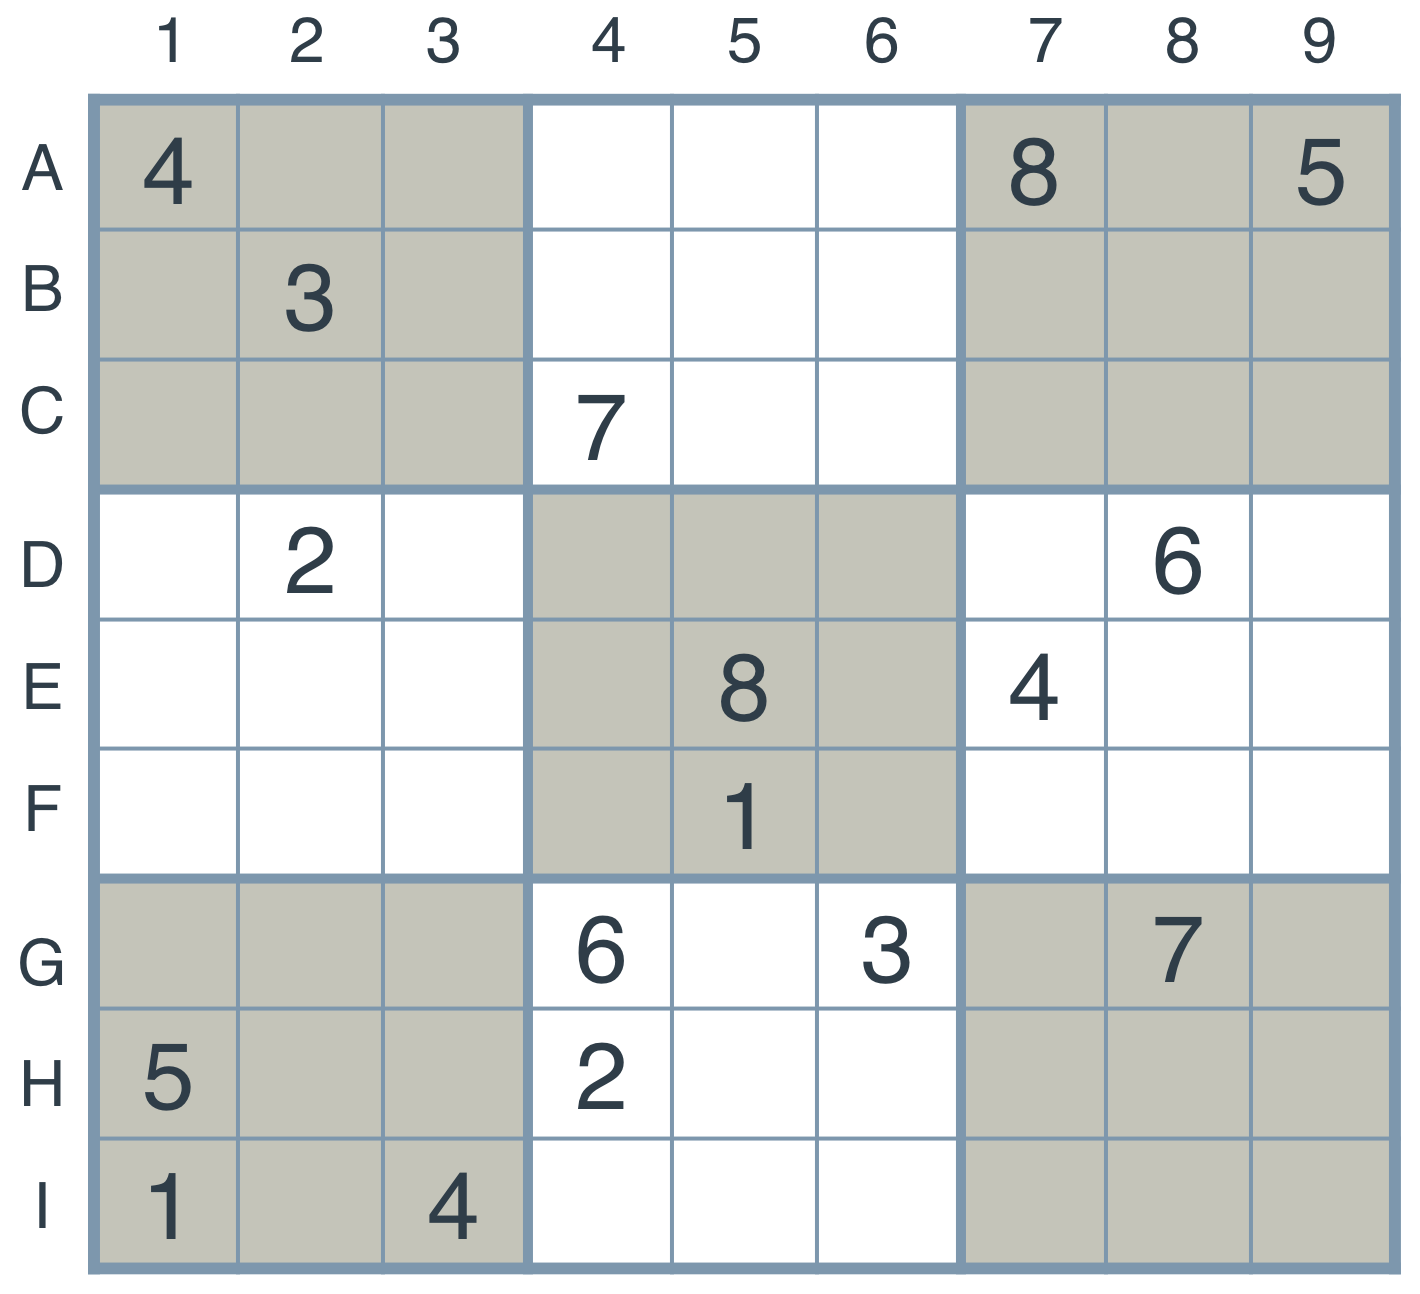


When we apply `reduce_puzzle`, we get the following grid:

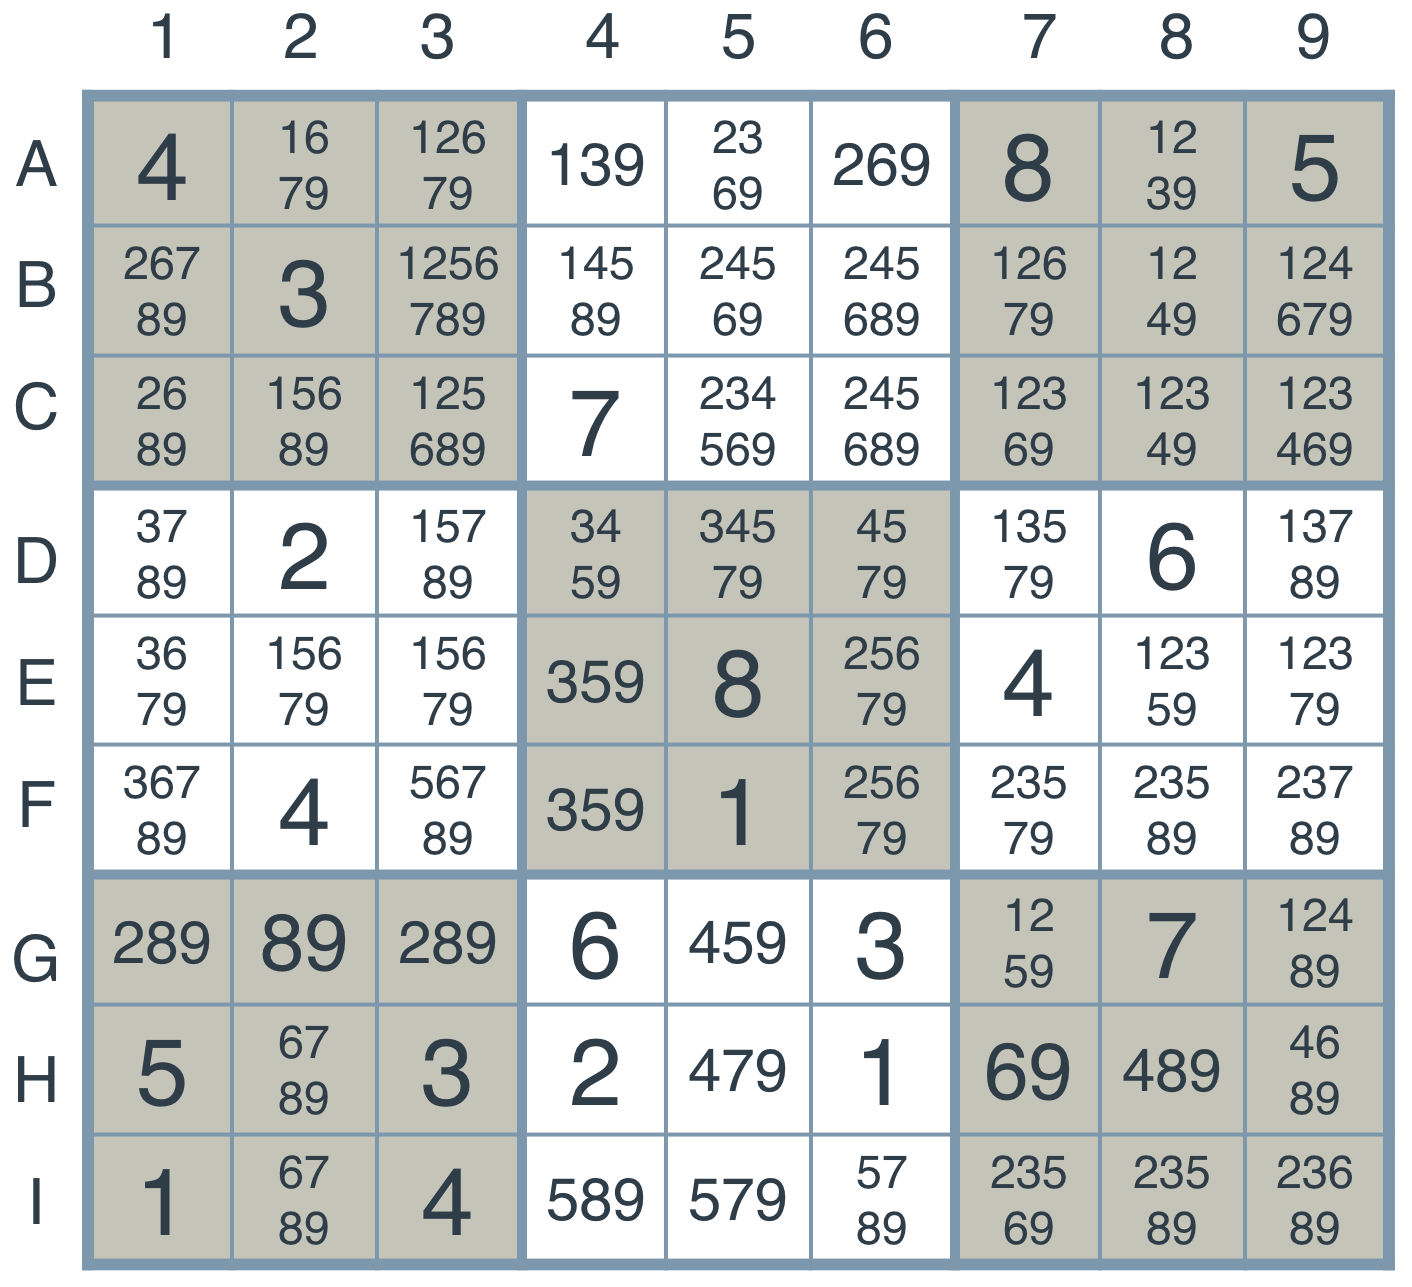

Therefore, we need another strategy!

### Strategy 3: Search

* Search is used throughout AI from Game-Playing to Route Planning to efficienty find solutions.
* Say the box `A2` has four possibilities: 1, 6, 7, 9. Here, try filling it in with a 1 and solve our puzzle. If we can't solve it, then we try 6, then 7, and then 9.
* Meanwhile, we can be smarter by choosing better choice for a box, which has the least number of possibilities.


* **Pick a box with a minimal number of possible values.** Try to solve each of the puzzles obtained by choosing each of these values, recursively.


* Example: a tree using Depth First Search


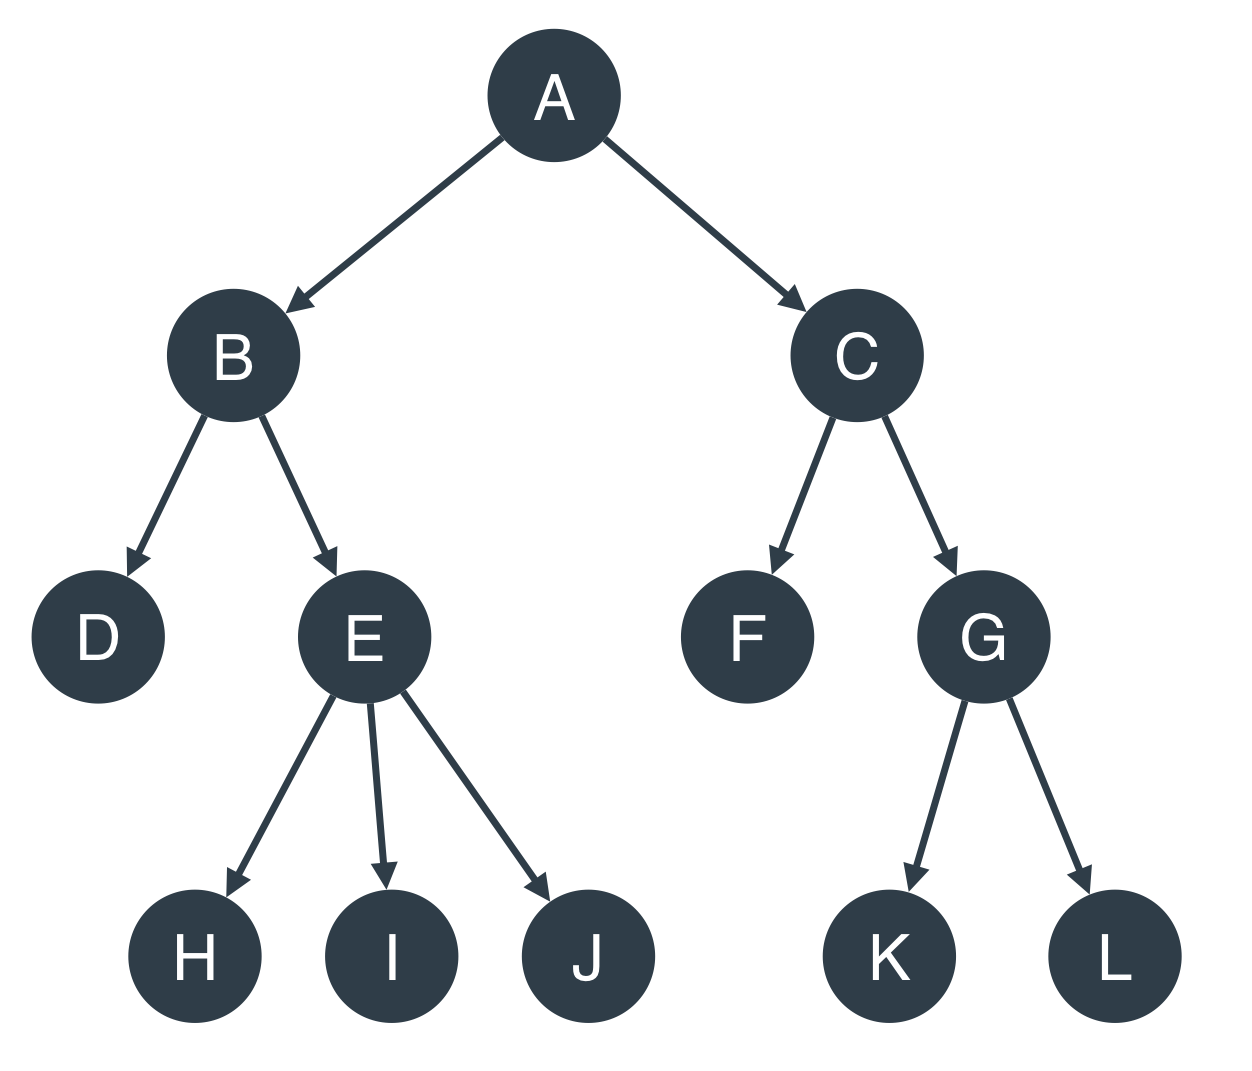

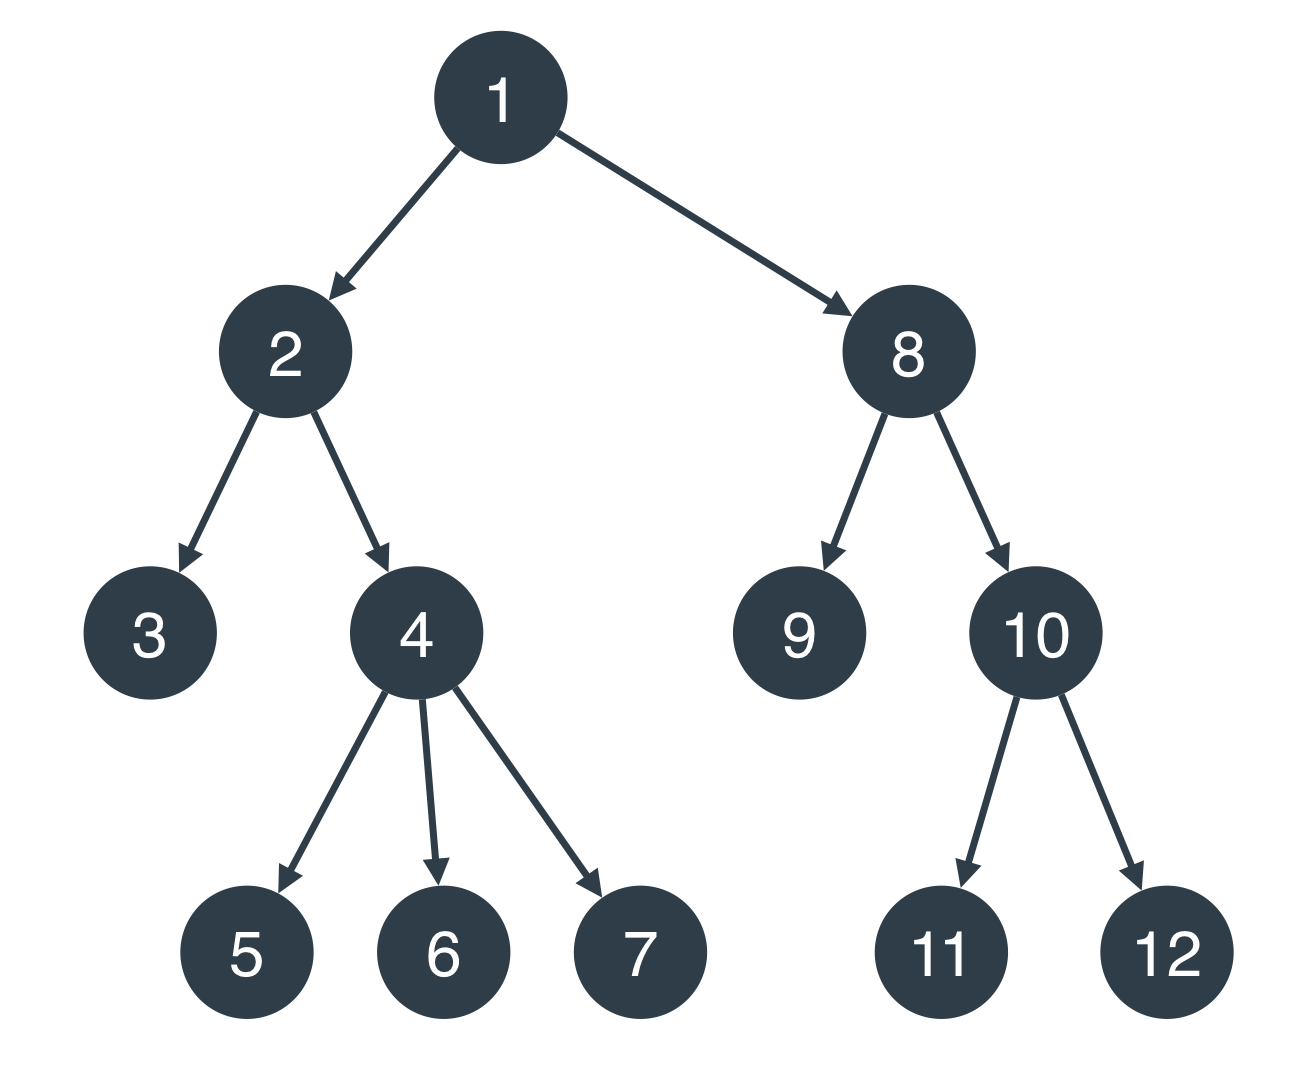


Now, code the function `search` which creates a tree of possibilities and traverse it using DFS until it finds a solution for the sudoku puzzle.

In [22]:
def search(values):
    "Using depth-first search and propagation, try all possible values."
    # First, reduce the puzzle using the previous function
    values = reduce_puzzle(values)
    if values is False:
        return False ## Failed earlier
    if all(len(values[s]) == 1 for s in boxes): 
        return values ## Solved!
    # Choose one of the unfilled squares with the fewest possibilities
    n,s = min((len(values[s]), s) for s in boxes if len(values[s]) > 1)
    # Now use recurrence to solve each one of the resulting sudokus, and 
    for value in values[s]:
        new_sudoku = values.copy()
        new_sudoku[s] = value
        attempt = search(new_sudoku)
        if attempt:
            return attempt

In [23]:
grid2 = '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'
values = grid_values(grid2)

In [24]:
display(search(values))

4 1 7 |3 6 9 |8 2 5 
6 3 2 |1 5 8 |9 4 7 
9 5 8 |7 2 4 |3 1 6 
------+------+------
8 2 5 |4 3 7 |1 6 9 
7 9 1 |5 8 6 |4 3 2 
3 4 6 |9 1 2 |7 5 8 
------+------+------
2 8 9 |6 4 3 |5 7 1 
5 7 3 |2 9 1 |6 8 4 
1 6 4 |8 7 5 |2 9 3 


# Project: Solve Sudoku with AI

## Synopsis

In this project, we will use the Sudoku-solving agent to solve _diagonal_ Sudoku puzzles. A diagonal Sudoku puzzle is identical to traditional Sudoku puzzles with the added constraint that the boxes on the two main diagonals of the board must also contain the digits 1-9 in each cell (just like the rows, columns, and 3x3 blocks). 


In [25]:
for i in zip([1,2], [3, 4]):
    print(i)
    print(type(i))

(1, 3)
<class 'tuple'>
(2, 4)
<class 'tuple'>


In [26]:
rows = 'ABCDEFGHI'
cols = '123456789'
row_units = [cross(r, cols) for r in rows]
column_units = [cross(rows, c) for c in cols]
square_units = [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]
unitlist = row_units + column_units + square_units

# Updating unit list to add the new diagonal units
diagonal_units_L = [[val+key for val, key in zip(rows, cols)]]
diagonal_units_R = [[val+key for val, key in zip(rows, cols[::-1])]]
unitlist = unitlist + (diagonal_units_L + diagonal_units_R)

units = dict((s, [u for u in unitlist if s in u]) for s in boxes)
peers = dict((s, set(sum(units[s],[]))-set([s])) for s in boxes)


In [29]:
def solve(grid):
    """Find the solution to a Sudoku puzzle using search and constraint propagation

    Parameters
    ----------
    grid(string)
    
    Returns
    -------
    dict or False
        The dictionary representation of the final sudoku grid or False if no solution exists.
    """
    values = grid_values(grid)
    values = search(values)
    return values

In [30]:
diag_sudoku_grid = '2.............62....1....7...6..8...3...9...7...6..4...4....8....52.............3'
display(grid2values(diag_sudoku_grid))


2 . . |. . . |. . . 
. . . |. . 6 |2 . . 
. . 1 |. . . |. 7 . 
------+------+------
. . 6 |. . 8 |. . . 
3 . . |. 9 . |. . 7 
. . . |6 . . |4 . . 
------+------+------
. 4 . |. . . |8 . . 
. . 5 |2 . . |. . . 
. . . |. . . |. . 3 


In [31]:
grid_values(diag_sudoku_grid)
result = solve(diag_sudoku_grid)
display(result)


2 6 7 |9 4 5 |3 8 1 
8 5 3 |7 1 6 |2 4 9 
4 9 1 |8 2 3 |5 7 6 
------+------+------
5 7 6 |4 3 8 |1 9 2 
3 8 4 |1 9 2 |6 5 7 
1 2 9 |6 5 7 |4 3 8 
------+------+------
6 4 2 |3 7 9 |8 1 5 
9 3 5 |2 8 1 |7 6 4 
7 1 8 |5 6 4 |9 2 3 


And, now we can finally solve any kind of SUDOKU!!!